In [34]:
# libraries

import re
import json
import nltk
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from word2number import w2n
from langdetect import detect
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from langdetect import detect, DetectorFactory
from spacy.lang.en.stop_words import STOP_WORDS


In [2]:
# loading models
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/fedijay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fedijay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

In [4]:
# Loading file
df = pd.read_json('StanfordQuestionAnsweringDataset/train-v1.1.json')

In [5]:
# Function to clean and process each paragraph
def prepare_for_chatbot(paragraph):
    # Extract context and qas
    context = paragraph['context']
    qas = paragraph['qas']

    # Extract questions and answers
    questions = [item['question'] for item in qas]
    answers = [item['answers'][0]['text'] for item in qas]

    # Clean questions and answers
    cleaned_questions = [re.sub(r"[^a-zA-Z0-9?.!,¿]+", " ", question).strip() for question in questions]
    cleaned_answers = [re.sub(r"[^a-zA-Z0-9?.!,¿]+", " ", answer).strip() for answer in answers]

    # Pair them together
    qa_pairs = list(zip(cleaned_questions, cleaned_answers))
    
    return {
        'context': context,
        'qa_pairs': qa_pairs
    }

# Process each article and paragraph
all_data = []
for article in df['data']:
    for paragraph in article['paragraphs']:
        all_data.append(prepare_for_chatbot(paragraph))

# For demonstration, printing the context and QA pairs of the first paragraph
print("Context:", all_data[0]['context'])
for q, a in all_data[0]['qa_pairs']:
    print("Question:", q)
    print("Answer:", a)
    print("-----")

Context: Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.
Question: To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
Answer: Saint Bernadette Soubirous
-----
Question: What is in front of the Notre Dame Main Building?
Answer: a copper statue of Christ
-----
Question: The Basilica of the Sacred heart at Notre Dame is beside to wh

In [6]:
# Demonstrate for the first 5 contexts
for data_entry in all_data[:5]:
    print("Context:", data_entry['context'])
    for q, a in data_entry['qa_pairs']:
        print("Question:", q)
        print("Answer:", a)
        print("-----")
    print("==========")
    # print("Total number of processed contexts:", len(all_data))   if needed

Context: Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.
Question: To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
Answer: Saint Bernadette Soubirous
-----
Question: What is in front of the Notre Dame Main Building?
Answer: a copper statue of Christ
-----
Question: The Basilica of the Sacred heart at Notre Dame is beside to wh

In [9]:
# language processing
ps = PorterStemmer()

def detect_language(text):
    return detect(text)

def normalize(text):
    return ' '.join(word_tokenize(text.lower()))

def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stopwords.words('english')])

def stem_text(text):
    words = word_tokenize(text)
    return ' '.join([ps.stem(word) for word in words])

def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Demonstration for the first 3 contexts in the dataset
for entry in all_data[:3]:
    context = entry['context']
    
    print("Original Text:", context)
    print("Language Detected:", detect_language(context))
    context = normalize(context)
    print("\nNormalized Text:", context)
    context = remove_stopwords(context)
    print("\nText after Stopword Removal:", context)
    context = stem_text(context)
    print("\nText after Stemming:", context)
    context = lemmatize_text(context)
    print("\nText after Lemmatization:", context)
    print("\n===========================\n")

Original Text: Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.
Language Detected: en

Normalized Text: architecturally , the school has a catholic character . atop the main building 's gold dome is a golden statue of the virgin mary . immediately in front of the main building and facing it , is a copper statue of christ with arms upraised with the le

## Save the dataframe to CSV

In [10]:
# # Flatten the data for the dataframe
# flattened_data = []
# for entry in all_data:
#     context = entry['context']
#     for q, a in entry['qa_pairs']:
#         flattened_data.append({'context': context, 'question': q, 'answer': a})

# # Convert the flattened data to a dataframe
# df_processed = pd.DataFrame(flattened_data)

# # Save the dataframe to CSV
# df_processed.to_csv('processed_data.csv', index=False)

## Working with the processed data

In [11]:
# Load the data (df_processed)
df_processed = pd.read_csv('processed_data.csv')

# Display the first few rows to verify the data has been loaded correctly
print(df_processed.head())

                                             context  \
0  Architecturally, the school has a Catholic cha...   
1  Architecturally, the school has a Catholic cha...   
2  Architecturally, the school has a Catholic cha...   
3  Architecturally, the school has a Catholic cha...   
4  Architecturally, the school has a Catholic cha...   

                                            question  \
0  To whom did the Virgin Mary allegedly appear i...   
1  What is in front of the Notre Dame Main Building?   
2  The Basilica of the Sacred heart at Notre Dame...   
3                  What is the Grotto at Notre Dame?   
4  What sits on top of the Main Building at Notre...   

                                    answer  
0               Saint Bernadette Soubirous  
1                a copper statue of Christ  
2                        the Main Building  
3  a Marian place of prayer and reflection  
4       a golden statue of the Virgin Mary  


In [12]:
# Renaming DataFrame
dfp = df_processed

In [13]:
# Getting Info of Data:
print(type(dfp))
print(dfp.keys())
print(dfp.shape)

<class 'pandas.core.frame.DataFrame'>
Index(['context', 'question', 'answer'], dtype='object')
(87599, 3)


In [14]:
print(dfp.head)

<bound method NDFrame.head of                                                  context  \
0      Architecturally, the school has a Catholic cha...   
1      Architecturally, the school has a Catholic cha...   
2      Architecturally, the school has a Catholic cha...   
3      Architecturally, the school has a Catholic cha...   
4      Architecturally, the school has a Catholic cha...   
...                                                  ...   
87594  Kathmandu Metropolitan City (KMC), in order to...   
87595  Kathmandu Metropolitan City (KMC), in order to...   
87596  Kathmandu Metropolitan City (KMC), in order to...   
87597  Kathmandu Metropolitan City (KMC), in order to...   
87598  Kathmandu Metropolitan City (KMC), in order to...   

                                                question  \
0      To whom did the Virgin Mary allegedly appear i...   
1      What is in front of the Notre Dame Main Building?   
2      The Basilica of the Sacred heart at Notre Dame...   
3        

In [15]:
print(dfp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87599 entries, 0 to 87598
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   context   87599 non-null  object
 1   question  87599 non-null  object
 2   answer    87585 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB
None


In [16]:
# Descriptive statistics summary
print(dfp.describe())

                                                  context  \
count                                               87599   
unique                                              18891   
top     In 1853, Victoria gave birth to her eighth chi...   
freq                                                   25   

                                                 question answer  
count                                               87599  87585  
unique                                              87334  64652  
top     I couldn t could up with another question. But...  three  
freq                                                    6    233  


In [17]:
# sample size language detecting
sample = dfp.sample(10)
sample['language'] = sample['context'].apply(detect_language)
print(sample[['context', 'language']])


                                                 context language
81143  A major international priority for Tuvalu in t...       en
2626   iPods with color displays use anti-aliased gra...       en
9721   The economy is a mixture of village agricultur...       en
66569  Most common glass contains other ingredients t...       en
740    The feminism and female empowerment themes on ...       en
32358  Service trials demonstrated another problem ho...       en
64314  Logically, no number of positive outcomes at t...       en
63091  There were no anamorphic LaserDisc titles avai...       en
69469  In his Science of Logic (1812–1814) Hegel argu...       en
11716  Because of its coastal location, the economy o...       en


In [18]:
# Ensuring deterministic results
DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(str(text))
    except Exception as e:
        print(f"Error with text: {text}. Error: {e}")
        return "Unable to detect"

# Ensure there are no missing values in the 'context' column
dfp['context'].fillna("", inplace=True)

# Apply language detection
dfp['language'] = dfp['context'].apply(detect_language)
print(dfp['language'].value_counts())

en    87599
Name: language, dtype: int64


In [20]:
DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(str(text))
    except Exception as e:
        return "Unable to detect"

In [21]:
# sample data to process language detecting
sample = dfp.sample(100)
sample[f'detect_context'] = sample['context'].apply(detect_language)
print(sample['detect_context'])

52941    en
19469    en
80549    en
33346    en
82847    en
         ..
41253    en
84097    en
17556    en
6083     en
84491    en
Name: detect_context, Length: 100, dtype: object


In [22]:
# detecting languages
columns_to_detect = ['context', 'question', 'answer']

for col in columns_to_detect:
    dfp[f'detect_{col}'] = dfp[col].apply(detect_language)

In [23]:
detected_lang_columns = [f'detect_{col}' for col in columns_to_detect]
unique_languages = set()

for col in detected_lang_columns:
    unique_languages = unique_languages.union(set(dfp[col].unique()))

print("Unique languages detected:", unique_languages)

Unique languages detected: {'af', 'en', 'it', 'sv', 'nl', 'de', 'es', 'lt', 'cs', 'hr', 'Unable to detect', 'fr', 'no', 'ca', 'pl', 'pt', 'tr', 'lv', 'et', 'sl', 'da', 'so', 'sw', 'vi', 'hu', 'ro', 'sq', 'fi', 'tl', 'sk', 'cy', 'id'}


In [24]:
language_counts = df_processed['language'].value_counts()
print(language_counts)

en    87599
Name: language, dtype: int64


In [26]:
# # Convert the entire column to string
# dfp['context'] = dfp['context'].astype(str)
# dfp['question'] = dfp['question'].astype(str)
# dfp['answer'] = dfp['answer'].astype(str)

# # Handle NaNs by replacing them with a placeholder (if any still remain after the type conversion)
# dfp['context'].fillna('missing', inplace=True)
# dfp['question'].fillna('missing', inplace=True)
# dfp['answer'].fillna('missing', inplace=True)

# # Now you apply the preprocess_text function
# dfp['processed_context'] = dfp['context'].apply(preprocess_text)
# dfp['processed_question'] = dfp['question'].apply(preprocess_text)
# dfp['processed_answer'] = dfp['answer'].apply(preprocess_text)

In [27]:
# !pip install spacy word2number

In [28]:
# Create a function to convert words to numbers
def words_to_numbers(text):
    try:
        return str(w2n.word_to_num(text))
    except:
        return text

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Convert words to numbers
    text = words_to_numbers(text)
    
    # Tokenization, Lemmatization, Removing Stopwords, and Punctuations
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc 
        if not token.is_stop 
        and not token.is_punct
    ]
    
    return " ".join(tokens)

# Apply the function to each column
dfp['processed_context'] = dfp['context'].astype(str).apply(preprocess_text)
dfp['processed_question'] = dfp['question'].astype(str).apply(preprocess_text)
dfp['processed_answer'] = dfp['answer'].astype(str).apply(preprocess_text)


sample = dfp.sample(10)  # get a random sample of 10 rows
sample['processed_context'] = sample['context'].apply(preprocess_text)
print(sample['processed_context'])

In [29]:
# Function to remove IPA symbols from tokens
def remove_ipa(tokens):
    # Regular expression to match common IPA symbols   * "International Phonetic Alphabet."
    ipa_pattern = re.compile(r'[ɒˈæʃθʊʌɑː]')
    return [token for token in tokens if not ipa_pattern.search(token)]

# Create a function to convert words to numbers
def words_to_numbers(text):
    try:
        return str(w2n.word_to_num(text))
    except:
        return text

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Convert words to numbers
    text = words_to_numbers(text)
    
    # Tokenization, Lemmatization, Removing Stopwords, and Punctuations
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc 
        if not token.is_stop 
        and not token.is_punct
    ]
    
    # Remove IPA symbols from the tokens
    tokens = remove_ipa(tokens)
    
    return " ".join(tokens)

# Apply the function to each column
dfp['processed_context'] = dfp['context'].astype(str).apply(preprocess_text)
dfp['processed_question'] = dfp['question'].astype(str).apply(preprocess_text)
dfp['processed_answer'] = dfp['answer'].astype(str).apply(preprocess_text)


In [30]:
# Sample a subset of the data
sample = dfp.sample(10)

# Apply the preprocessing function to the sample
sample['processed_context'] = sample['context'].astype(str).apply(preprocess_text)

# Print the processed data to check the output
print(sample[['context', 'processed_context']])

                                                 context  \
49808  When the alloy cools and solidifies (crystalli...   
39177  The Allies offered peace terms in the Frankfur...   
76242  Paraplegia, the loss of sensation and voluntar...   
24316  The Times is the first newspaper to have borne...   
27652  In the 16th century, Count Hieronymus Schlick ...   
79134  In 2005 two city council members, Ralph Inzunz...   
22155  Following the fall of Wu and the turmoil of th...   
64649  The life cycles of insects vary but most hatch...   
62414  Royal assent is the method by which a country'...   
55336  In 1469, following the Treaty of St. Omer, Upp...   

                                       processed_context  
49808                                                  1  
39177  ally offer peace term frankfurt proposal novem...  
76242                                                 15  
24316  time newspaper bear lend numerous paper world ...  
27652  16th century count hieronymus schlick

In [32]:
# Combine all the processed contexts into one long string
all_words = ' '.join(dfp['processed_context'])

# Split the string into individual words
word_list = all_words.split()

# Count the frequency of each word
word_freq = Counter(word_list)

# Display the most common words and their frequencies
print(word_freq.most_common(10))

[('include', 12557), ('new', 11940), ('city', 11290), ('state', 10882), ('1', 9712), ('century', 9057), ('time', 8574), ('year', 8052), ('large', 7883), ('2', 7735)]


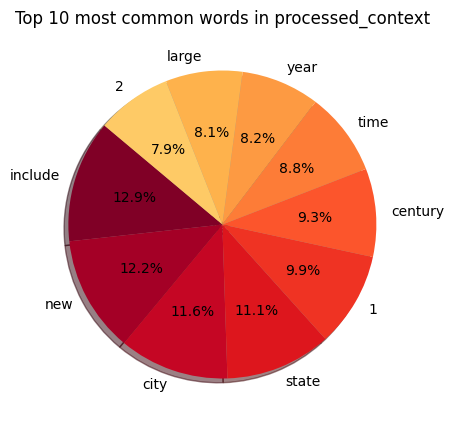

In [40]:
# Get the 10 most common words and their frequencies
common_words = word_freq.most_common(10)

# Separate words and their counts into two lists
words, counts = zip(*common_words)
colors = plt.cm.YlOrRd(np.linspace(0.3, 1, 10))[::-1]  # 'YlOrRd' provides a heatmap-like effect

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True) # Shadow and heatmap-like color
plt.title('Top 10 most common words in processed_context')
plt.show()

## Retrieval-based Chatbot using TF-IDF and Cosine Similarity:

**1. Data Preparation:**
We'll concatenate questions and answers into one list. This will help us in finding the closest match to user input.

**2. TF-IDF Vectorization:**
We'll convert our text data into a matrix of TF-IDF features.

**3. Response Retrieval:**
Given a user input, we'll find the closest match in our dataset using cosine similarity and return the corresponding answer.

In [51]:
# loading libraries

from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics.pairwise import cosine_similarity
from keras.layers import Embedding, LSTM, Dense, Input
from sklearn.feature_extraction.text import TfidfVectorizer


In [52]:

# 1. Tokenization
MAX_NUM_WORDS = 20000  # Maximum number of words to keep based on word frequency
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)

# Fit the tokenizer on questions + answers
tokenizer.fit_on_texts(list(dfp['processed_context']) + list(dfp['processed_answer']))

# Convert text to sequences
encoder_input_data = tokenizer.texts_to_sequences(dfp['processed_context'])
decoder_input_data = tokenizer.texts_to_sequences(dfp['processed_answer'])

# 2. Calculate the number of unique tokens + padding for consistent sequence length
num_encoder_tokens = len(tokenizer.word_index) + 1  # +1 for padding
num_decoder_tokens = len(tokenizer.word_index) + 1  # +1 for padding

max_encoder_seq_length = max([len(txt) for txt in encoder_input_data])
max_decoder_seq_length = max([len(txt) for txt in decoder_input_data])

encoder_input_data = pad_sequences(encoder_input_data, maxlen=max_encoder_seq_length, padding='post')
decoder_input_data = pad_sequences(decoder_input_data, maxlen=max_decoder_seq_length, padding='post')

# We also need decoder target data for training which is one timestep ahead
decoder_target_data = np.zeros_like(decoder_input_data)
decoder_target_data[:, :-1] = decoder_input_data[:, 1:]
decoder_target_data = np.expand_dims(decoder_target_data, -1)

# 3. Define the encoder-decoder architecture
latent_dim = 256  # Latent dimensionality of encoding space

# Encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(num_encoder_tokens, latent_dim)(encoder_inputs)
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None,))
decoder_embedding_layer = Embedding(num_decoder_tokens, latent_dim)
decoder_embedding = decoder_embedding_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# 4. Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size=64, epochs=10, validation_split=0.2)


Epoch 1/10
1095/1095 [==============================] - 2496s 2s/step - loss: 0.7396 - val_loss: 0.6854
Epoch 2/10
1095/1095 [==============================] - 2505s 2s/step - loss: 0.5342 - val_loss: 0.6723
Epoch 3/10
1095/1095 [==============================] - 2492s 2s/step - loss: 0.5095 - val_loss: 0.6625
Epoch 4/10
1095/1095 [==============================] - 2487s 2s/step - loss: 0.4849 - val_loss: 0.6631
Epoch 5/10
1095/1095 [==============================] - 4344s 4s/step - loss: 0.4586 - val_loss: 0.6660
Epoch 6/10
1095/1095 [==============================] - 41379s 38s/step - loss: 0.4323 - val_loss: 0.6717
Epoch 7/10
1095/1095 [==============================] - 2113s 2s/step - loss: 0.4060 - val_loss: 0.6827
Epoch 8/10
1095/1095 [==============================] - 4432s 4s/step - loss: 0.3802 - val_loss: 0.6979
Epoch 9/10
1095/1095 [==============================] - 2384s 2s/step - loss: 0.3542 - val_loss: 0.7164
Epoch 10/10
1095/1095 [==============================] - 3361s